# **Titanic Prediction**

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

### MARKDOWN
Makine eğitimini tran_df üzerinden yapacağımız için ve test verilerini modelimizin bilmemesi gerektiğinden eğitim verilerini kullanarak devam edeceğiz.

Modeli test edene kadar test_df ye dokunmak yok.

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Passenger_ID, yolcunun hayatta kalıp kalmadığı bilgisi hakkında tahmin yürütebilceğimiz bir sütun değildir. Ayrıca, name Sütunu da kısmen ID niteliği taşıdığından bu sütun da işimize pek yaramayacaktır. 

Dolayısı ile Passenger_ıd ve Name sütunlarını burdan kaldıralım. Ve yeni eğitim setimizi oluşturup devam edelim.

In [5]:
df_train2 = df_train.drop(['PassengerId', 'Name'], axis=1)

In [6]:
df_train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df_train2.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [9]:
age_means = df_train2.groupby('Survived')['Age'].mean()

# NaN değerlerini grup ortalamaları ile doldurma
df_train2['Age'] = df_train2.apply(
    lambda row: age_means[row['Survived']] if pd.isna(row['Age']) else row['Age'],
    axis=1
)

In [10]:
df_train2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
# NAN Kabin verileri total verilerin yarısında fazla olduğu için siliyoruz
df_train2 = df_train2.drop('Cabin', axis=1)

In [12]:
# EMBARKED kısmına NAN verileri siliyoruz, çünkü eksik veri sayısı doldurmaya değmez
df_train2 = df_train2.dropna()

In [13]:
df_train2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [14]:
# Kategorik verileri sayısal verilere dönüştürüyoruz

df_train2 = pd.get_dummies(df_train2, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# drop_first=True ile kategorik verilerin ilk kısmını ve kukla verileri kaldırıyoruz


In [15]:
df_train2.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,A/5 21171,7.2500,True,False,True,False,True
1,1,38.0,1,0,PC 17599,71.2833,False,False,False,False,False
2,1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,False,True
3,1,35.0,1,0,113803,53.1000,False,False,True,False,False
4,0,35.0,0,0,373450,8.0500,True,False,True,False,True


In [16]:
# Bilet bilgisi bizim için bir anlam ifade etmez, buna dikkat etmemiz gerekiyor

df_train2 = df_train2.drop('Ticket', axis=1)

In [17]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Fare        889 non-null    float64
 5   Sex_male    889 non-null    bool   
 6   Embarked_Q  889 non-null    bool   
 7   Embarked_S  889 non-null    bool   
 8   Pclass_2    889 non-null    bool   
 9   Pclass_3    889 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 46.0 KB


In [18]:
df_train2.describe()

,Survived,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,29.704515,0.524184,0.382452,32.096681
std,0.486260,12.977255,1.103705,0.806761,49.697504
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


## outliers

Veri setini aykırı değerlerden temizleyelim.

In [19]:
df_train2

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,True,False,True,False,True
1,1,38.000000,1,0,71.2833,False,False,False,False,False
2,1,26.000000,0,0,7.9250,False,False,True,False,True
3,1,35.000000,1,0,53.1000,False,False,True,False,False
4,0,35.000000,0,0,8.0500,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,True,False,True,True,False
887,1,19.000000,0,0,30.0000,False,False,True,False,False
888,0,30.626179,1,2,23.4500,False,False,True,False,True
889,1,26.000000,0,0,30.0000,True,False,False,False,False


In [20]:
df_train2[['Age', 'SibSp', 'Parch', 'Fare', 'Survived']].describe()

,Age,SibSp,Parch,Fare,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,29.704515,0.524184,0.382452,32.096681,0.382452
std,12.977255,1.103705,0.806761,49.697504,0.486260
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800,0.000000
50%,30.000000,0.000000,0.000000,14.454200,0.000000
75%,35.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [21]:
outliers = df_train2[['Age', 'SibSp', 'Parch', 'Fare']].quantile(0.99)
outliers

Age       65.000000
SibSp      5.000000
Parch      4.000000
Fare     249.303304
Name: 0.99, dtype: float64

In [22]:
df_train2 = df_train2[df_train2['Age'] < outliers['Age']]
df_train2 = df_train2[df_train2['SibSp'] < outliers['SibSp']]
df_train2 = df_train2[df_train2['Parch'] < outliers['Parch']]
df_train2 = df_train2[df_train2['Fare'] < outliers['Fare']]

In [23]:
df_train2[['Age', 'SibSp', 'Parch', 'Fare', 'Survived']].describe()

,Age,SibSp,Parch,Fare,Survived
count,848.000000,848.000000,848.000000,848.000000,848.000000
mean,29.182112,0.429245,0.301887,28.413177,0.390330
std,12.233206,0.808569,0.628633,36.906696,0.488112
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800,0.000000
50%,29.000000,0.000000,0.000000,13.458350,0.000000
75%,34.000000,1.000000,0.000000,29.125000,1.000000
max,64.000000,4.000000,3.000000,247.520800,1.000000


In [24]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    848 non-null    int64  
 1   Age         848 non-null    float64
 2   SibSp       848 non-null    int64  
 3   Parch       848 non-null    int64  
 4   Fare        848 non-null    float64
 5   Sex_male    848 non-null    bool   
 6   Embarked_Q  848 non-null    bool   
 7   Embarked_S  848 non-null    bool   
 8   Pclass_2    848 non-null    bool   
 9   Pclass_3    848 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 43.9 KB


## Training

In [25]:
x = df_train2.drop('Survived', axis=1)
y = df_train2['Survived']

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

2024-05-24 18:11:59.970099: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 18:11:59.970314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 18:12:00.168536: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(x, y, epochs=250)

Epoch 1/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6380 - loss: 0.6862
Epoch 2/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7151 - loss: 0.5896
Epoch 3/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.5803
Epoch 4/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 0.5862
Epoch 5/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6996 - loss: 0.5959
Epoch 6/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - loss: 0.5839
Epoch 7/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7158 - loss: 0.5812
Epoch 8/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - loss: 0.5961
Epoch 9/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6983 - loss: 0.5937
Epoch 10/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7258 - loss: 0.5712
Epoch 11/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6742 - loss: 0.6005
Epoch 12/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [28]:
hist = model.history.history

In [29]:
hist = pd.DataFrame(hist)

<Axes: >

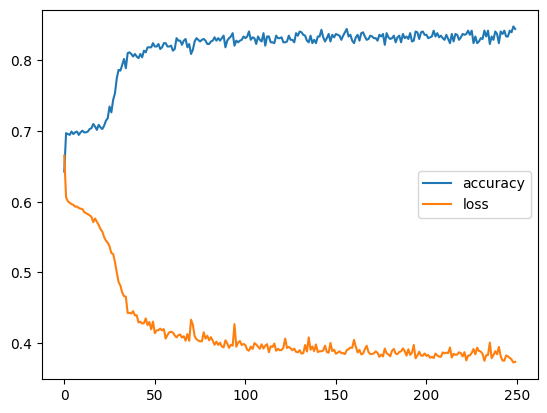

In [30]:
hist.plot()

In [31]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
df_train2

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,True,False,True,False,True
1,1,38.000000,1,0,71.2833,False,False,False,False,False
2,1,26.000000,0,0,7.9250,False,False,True,False,True
3,1,35.000000,1,0,53.1000,False,False,True,False,False
4,0,35.000000,0,0,8.0500,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,True,False,True,True,False
887,1,19.000000,0,0,30.0000,False,False,True,False,False
888,0,30.626179,1,2,23.4500,False,False,True,False,True
889,1,26.000000,0,0,30.0000,True,False,False,False,False


In [33]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
df_test2 = df_test.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis=1)
df_test2 = pd.get_dummies(df_test2, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

/tmp/ipykernel_18/2214571512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
/tmp/ipykernel_18/2214571512.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mean_absolute_error(df_train2['Survived'], model.predict(df_train2.drop('Survived', axis=1)))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.23409684103878461

In [37]:
predicts = model.predict(df_test2)
rounded_predicts = np.where(predicts < 0.5, 0, 1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [38]:
np.set_printoptions(suppress=True)
predicts

array([[0.09190092],
       [0.1973119 ],
       [0.10741994],
       [0.10864133],
       [0.40725052],
       [0.21825781],
       [0.7174506 ],
       [0.11566254],
       [0.60960895],
       [0.12183745],
       [0.09978848],
       [0.3969005 ],
       [0.9928556 ],
       [0.15105072],
       [0.9990237 ],
       [0.9904088 ],
       [0.12159637],
       [0.1240132 ],
       [0.3160031 ],
       [0.39853886],
       [0.22520727],
       [0.8359152 ],
       [0.99355435],
       [0.5229769 ],
       [0.92826325],
       [0.07833411],
       [0.99945617],
       [0.12368567],
       [0.4193267 ],
       [0.10439067],
       [0.15056327],
       [0.1504216 ],
       [0.30888027],
       [0.34468162],
       [0.41039643],
       [0.12757103],
       [0.41609645],
       [0.5143772 ],
       [0.11525635],
       [0.50962335],
       [0.0748327 ],
       [0.46267018],
       [0.08398035],
       [0.9225738 ],
       [0.9965154 ],
       [0.11127619],
       [0.36568332],
       [0.098

In [39]:
rounded_predicts = np.where(predicts < 0.5, 0, 1)
rounded_predicts

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [40]:
df_test_out = pd.concat([df_test['PassengerId'], pd.DataFrame(rounded_predicts)], axis=1)

In [41]:
df_test_out.columns = ['PassengerId', 'Survived']

In [42]:
df_test_out

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
df_test_out.to_csv('submission.csv', index=False)